#PDF and CDF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

In [3]:
x = np.linspace(-6, 6, 1000)

In [4]:
fx = norm.pdf(x, loc=0, scale=1)

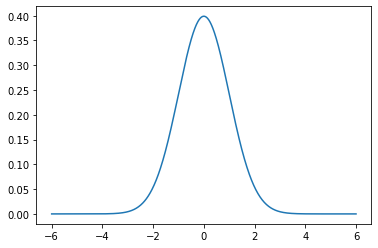

In [5]:
plt.plot(x, fx);

In [6]:
Fx = norm.cdf(x, loc=0, scale=1)

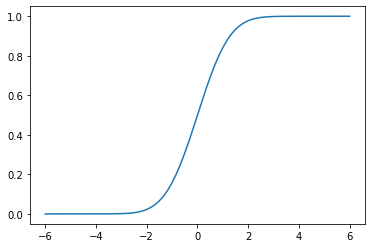

In [7]:
plt.plot(x, Fx)

In [8]:
logfx = norm.logpdf(x, loc=0, scale=1)

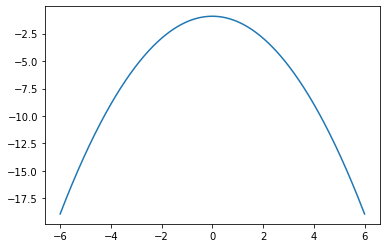

In [10]:
plt.plot(x, logfx)

#Convolution

In [11]:
from PIL import Image

In [12]:
!wget https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg

--2023-02-24 23:28:19--  https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg
Resolving i.natgeofe.com (i.natgeofe.com)... 23.1.236.10, 23.1.236.11, 2600:1406:5400::48f7:d391, ...
Connecting to i.natgeofe.com (i.natgeofe.com)|23.1.236.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1155285 (1.1M) [image/jpeg]
Saving to: ‘NationalGeographic_2572187_square.jpg’

NationalGeographic_ 100%[===================>]   1.10M  --.-KB/s    in 0.03s   

2023-02-24 23:28:19 (32.5 MB/s) - ‘NationalGeographic_2572187_square.jpg’ saved [1155285/1155285]



In [13]:
im = Image.open('NationalGeographic_2572187_square.jpg')

In [14]:
gray = np.mean(im, axis=2)

In [15]:
x = np.linspace(-6, 6, 50)

In [16]:
fx = norm.pdf(x, loc=0, scale=1)

In [17]:
filt = np.outer(fx, fx)

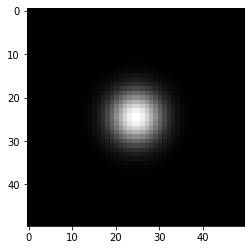

In [18]:
plt.imshow(filt, cmap='gray')

In [19]:
from scipy.signal import convolve2d

In [20]:
out = convolve2d(gray, filt)

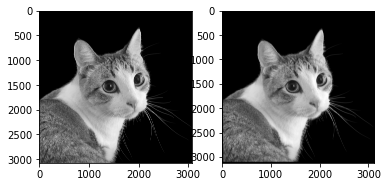

In [22]:
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray');

In [ ]:
Hx = np.outer([1, 2, 1], [1, 0, -1])
Gx = convolve2d(Hx, gray)
Hy = np.outer([1, 0, -1], [1, 2, 1])
Gy = convolve2d(Hy, gray)

G = np.sqrt(Gx**2 + Gy**2)
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(G, cmap="gray")
plt.show()